In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'png' 
import numpy as np
import scipy
import scipy.special
import scipy.stats
import math
import matplotlib.pyplot as plt
import sklearn.neighbors

In [31]:
N = 100000
data = np.random.multivariate_normal(mean=mu, cov=cov, size=N)
bw = N ** (-1/(k+4))
print("bw: {}".format(bw))
kernel = scipy.stats.multivariate_normal(
    mean = mu,
    cov = cov * bw * bw,
)

bw: 0.14677992676220697


In [48]:
kde = sklearn.neighbors.KernelDensity(bandwidth = bw).fit(data)
np.exp(kde.score_samples([np.zeros(k)]))

array([ 0.15686705])

In [72]:
def count_samples(k, n, p=0.01):
    mu = np.zeros(k)
    cov = np.diag(np.ones(k))
    dist = scipy.stats.multivariate_normal(
        mean = mu,
        cov = cov,
    )
    
    samples = np.random.multivariate_normal(mean=mu, cov=cov, size=n)
    pdfs = dist.pdf(samples)
    threshold = np.percentile(pdfs, p * 100)
    print("Thresh: {}".format(threshold))
    error_factor = 2**k
    print("Error Factor: {}".format(error_factor))
    
    hi_cut = np.sum((pdfs / error_factor) > threshold)
    lo_cut = np.sum((pdfs * error_factor) < threshold)
    print("Hi: {}, Lo: {}".format(hi_cut / n, lo_cut / n))

In [110]:
k = 6
p = 0.01
n = 100000
mu = np.zeros(k)
cov = np.diag(np.ones(k))
dist = scipy.stats.multivariate_normal(
    mean = mu,
    cov = cov,
)
samples = np.random.multivariate_normal(mean=mu, cov=cov, size=n)
pdfs = dist.pdf(samples)
threshold = np.percentile(pdfs, p * 100)
print(threshold)
borderline = samples[(pdfs > threshold) & (pdfs < 2 * threshold)]
print(len(borderline))
r = scipy.linalg.norm(borderline[0])
print("borderline radius: {}".format(r))

8.64519844683e-07
757
borderline radius: 3.9534123604801388


In [111]:
z = np.zeros(k)
z[0] = 3.95
dist.pdf(z)

1.649759234426973e-06

In [112]:
np.zeros((10,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

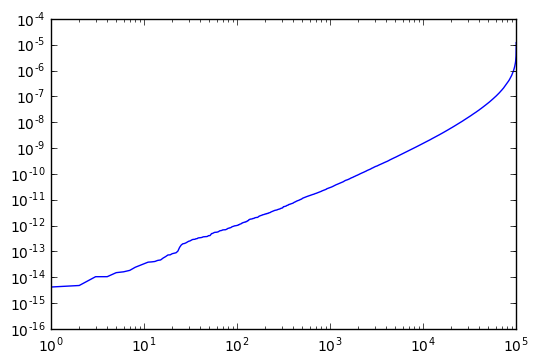

In [91]:
plt.loglog(np.sort(pdfs))

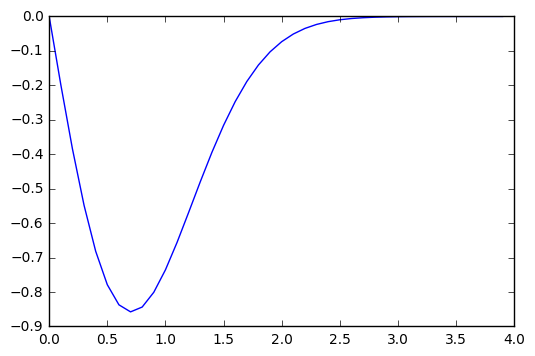

In [114]:
x = np.arange(0,4,.1)
y = -2 * x * np.exp(-x * x)
plt.plot(x, y)